In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gw = np.load("Energy_storage_demand.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'Energy_storage_demand.npy'

In [3]:
entsoe_2021 = pd.DataFrame({"t": [2025, 2030, 2030, 2030, 2040, 2040, 2050, 2050], 
                           "gw": [0, 10, 30, 40, 75, 100, 90, 100]})
entsoe_2022 = pd.DataFrame({"t": [2025, 2030, 2030, 2030, 2040, 2040, 2040, 2050, 2050],
                      "gw": [   7,   22,   62,   97,   41,  106,  173,  138,  238]})
ec = pd.DataFrame({"t": [2020, 2030, 2030, 2030, 2050, 2050, 2050],
                  "gw": [ 0.4,   20,   30,   40,   50,  120,  180]})

In [4]:
fig = plt.figure(figsize=[16, 4], facecolor ='white')
plt.rcParams.update({'font.size': 16})
transp = 0.5

t_range = np.arange(1950, 2051)
idx_range = np.arange(70,101)
t = t_range[idx_range]
# the storage demand numbers are in GWh, divide by 6 to get GW
C_rate = 1/6
# our scenarios
# plt.plot(t, gw[2][idx_range] * C_rate, label = "high")
# plt.plot(t, gw[1][idx_range] * C_rate, label = "medium")
# plt.plot(t, gw[0][idx_range] * C_rate, label = "low")

plt.fill_between(t, gw[2][idx_range] * C_rate, color = "tab:gray", label = "high", alpha = 0.3)
plt.fill_between(t, gw[1][idx_range] * C_rate, color = "tab:gray", label = "medium", alpha = 0.6)
plt.fill_between(t, gw[0][idx_range] * C_rate, color = "tab:gray", label = "low")
# sources
plt.scatter(entsoe_2021.t, entsoe_2021.gw, 40, "tab:brown", label = "ENTSOE 21")
plt.scatter(entsoe_2022.t, entsoe_2022.gw, 40, "tab:orange", label = "ENTSOE 22")
plt.scatter(ec.t, ec.gw, 40, "darkblue", label = "EC 18 & 20")
# formatting
plt.legend()
plt.ylabel("Storage demand [GW]")
plt.xlabel("Year")
plt.grid()
# save 
fig.savefig('storage_demand_GW.png',bbox_inches='tight', transparent=False, dpi = 600)

NameError: name 'gw' is not defined

<Figure size 1600x400 with 0 Axes>

In [5]:
# define logistic function to create storage need scenarios
def evol_logistic(T_years, T0, y_max, T_mid, slope):
    y = pd.Series(data = np.zeros(len(T_years)), index = T_years)
    for T in 1 + np.arange(T0, T_years[-1]):
        y.loc[T] = y_max / (1 + np.exp(-slope*(T - T_mid)))
    return y

In [6]:
T_years = np.arange(1950, 2051)
df_GW = pd.DataFrame(index = T_years)
df_GW['Low'] = evol_logistic(T_years, T0 = 2016, y_max = 50, T_mid = 2030.75, slope = 0.5)
df_GW['Medium'] = evol_logistic(T_years, T0 = 2016, y_max = 85, T_mid = 2031.25, slope = 0.5)
df_GW['High'] = evol_logistic(T_years, T0 = 2016, y_max = 120, T_mid = 2031.4, slope = 0.5)
df_GW['CP4All'] = evol_logistic(T_years, T0 = 2016, y_max = 180, T_mid = 2034, slope = 0.4)
# Added by Fernando 22.11.2022
df_GW['ENTSOE_2022'] = evol_logistic(T_years, T0 = 2016, y_max = 250, T_mid = 2034, slope = 0.4)

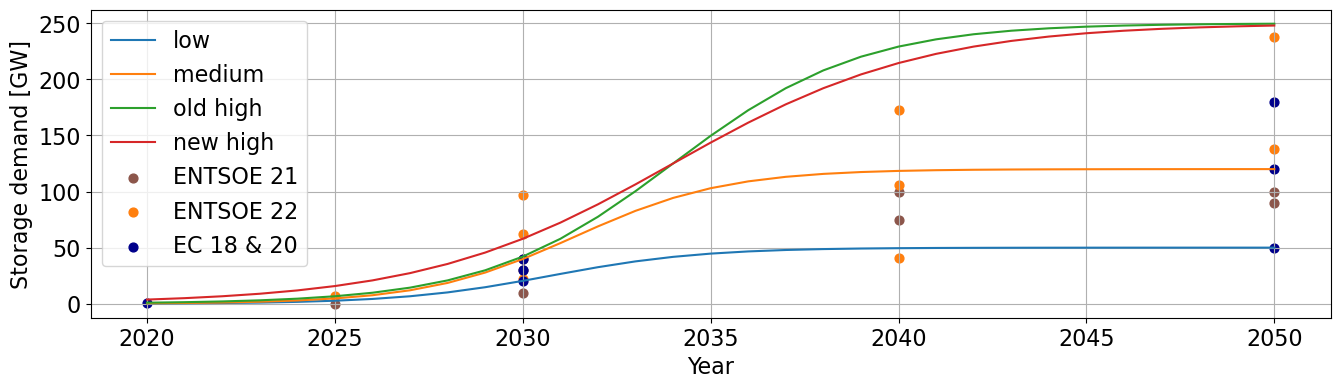

In [7]:
fig = plt.figure(figsize=[16, 4], facecolor ='white')
plt.rcParams.update({'font.size': 16})
transp = 0.5

t_range = np.arange(1950, 2051)
idx_range = np.arange(70,101)
t = t_range[idx_range]
# the storage demand numbers are in GWh, divide by 6 to get GW
C_rate = 1/6
# our scenarios

plt.plot(t, df_GW.Low[t], label = "low")
plt.plot(t, df_GW.High[t], label = "medium")
plt.plot(t, df_GW.ENTSOE_2022[t], label = "old high")

# Added by Dirk 21.04.2023
df_GW['ENTSOE_2022_new'] = evol_logistic(T_years, T0 = 2016, y_max = 250, T_mid = 2034, slope = 0.3)
plt.plot(t, df_GW.ENTSOE_2022_new[t], label = "new high")

# plt.plot(t, gw[2][idx_range] * C_rate, label = "high")
# plt.plot(t, gw[1][idx_range] * C_rate, label = "medium")
# plt.plot(t, gw[0][idx_range] * C_rate, label = "low")

# sources
plt.scatter(entsoe_2021.t, entsoe_2021.gw, 40, "tab:brown", label = "ENTSOE 21")
plt.scatter(entsoe_2022.t, entsoe_2022.gw, 40, "tab:orange", label = "ENTSOE 22")
plt.scatter(ec.t, ec.gw, 40, "darkblue", label = "EC 18 & 20")
# formatting
plt.legend()
plt.ylabel("Storage demand [GW]")
plt.xlabel("Year")
plt.grid()

numpy.ndarray

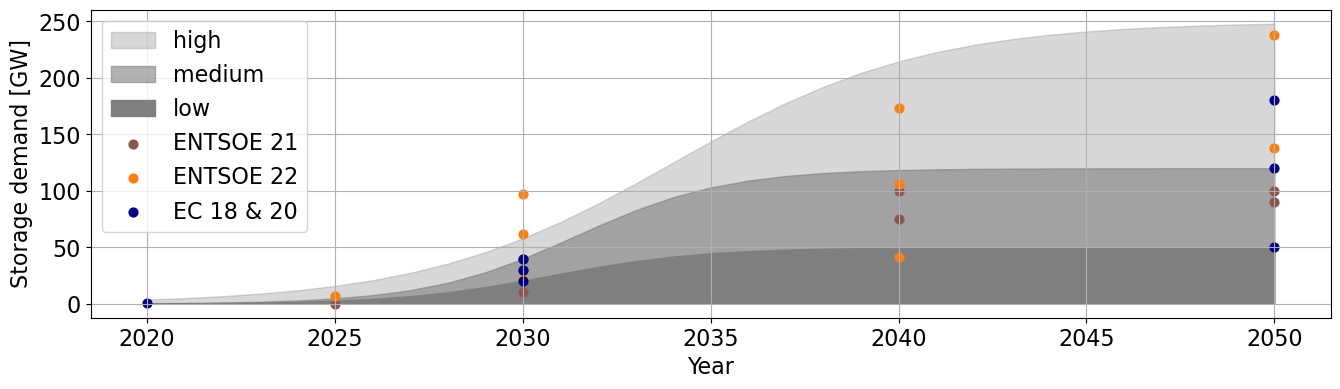

In [11]:
fig = plt.figure(figsize=[16, 4], facecolor ='white')
plt.rcParams.update({'font.size': 16})
transp = 0.5

t_range = np.arange(1950, 2051)
idx_range = np.arange(70,101)
t = t_range[idx_range]
# the storage demand numbers are in GWh, divide by 6 to get GW
# our scenarios
# plt.plot(t, gw[2][idx_range] * C_rate, label = "high")
# plt.plot(t, gw[1][idx_range] * C_rate, label = "medium")
# plt.plot(t, gw[0][idx_range] * C_rate, label = "low")

plt.fill_between(t, df_GW.ENTSOE_2022_new[t], color = "tab:gray", label = "high", alpha = 0.3)
plt.fill_between(t, df_GW.High[t], color = "tab:gray", label = "medium", alpha = 0.6)
plt.fill_between(t, df_GW.Low[t], color = "tab:gray", label = "low")
# sources
plt.scatter(entsoe_2021.t, entsoe_2021.gw, 40, "tab:brown", label = "ENTSOE 21")
plt.scatter(entsoe_2022.t, entsoe_2022.gw, 40, "tab:orange", label = "ENTSOE 22")
plt.scatter(ec.t, ec.gw, 40, "darkblue", label = "EC 18 & 20")
# formatting
plt.legend()
plt.ylabel("Storage demand [GW]")
plt.xlabel("Year")
plt.grid()
# save 
# fig.savefig('storage_demand_GW_new.png',bbox_inches='tight', transparent=False, dpi = 600)


In [18]:
# create structured array
storage = np.zeros((3, 101))
storage[2,:] = df_GW.ENTSOE_2022_new.values * 6 # high scenario
storage[1,:] = df_GW.High.values * 6 # medium scenario
storage[0,:] = df_GW.Low.values * 6 # low scenario

# save 
np.save('/Users/feraguilar/Library/CloudStorage/Box-Box/BATMAN/Coding/V2G_in_EU/data/scenario_data/230426_new_storage_scenarios', storage)
